# **04 - FeatureEngineering**

## Objectives

* Feature transformation to enhance the linearity of relationships between predictor variables and the target (dependent variable) in a machine learning model.

## Inputs

* outputs/datasets/cleaned/train_set_cleaned.csv
* outputs/datasets/cleaned/test_set_cleaned.csv

## Outputs

* Identify variables for ordinal categorical encoding.
* Select numerical features requiring transformation for improved model performance.
* Apply Winsorization to cap extreme feature values and mitigate the impact of outliers.
* Detect and address multicollinearity by identifying highly correlated features.

## Additional Comments

* 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/property-value-maximizer/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/property-value-maximizer'

Imports the Pandas library and reads CSV file train_set_cleaned.csv into DataFrame TrainSet and displays the first 10 rows.

In [4]:
import pandas as pd
TrainSet = pd.read_csv("outputs/datasets/cleaned/train_set_cleaned.csv")
TrainSet.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
0      1314       0.0      3.000000         922        392         294   
1       799     772.0      3.000000           0        799         380   
2       796       0.0      2.000000           0        796           0   
3       981     787.0      3.000000         569        162         240   
4      1026     665.0      3.000000         218        808         308   
5       894       0.0      3.000000         894          0         552   
6       684     876.0      3.000000           0        684         400   
7       796     358.0      3.000000         735         61         240   
8      1422       0.0      3.000000         588        606         576   
9      1496       0.0      2.888787           0       1496         474   

   GrLivArea KitchenQual  LotArea  LotFrontage  MasVnrArea  OpenPorchSF  \
0       1314          TA     8400         70.0         0.0            0   
1       1571          TA     7837         59.0         0.0           40   
2        796          TA     8777         67.0         0.0            0   
3       1768          Gd     7200         60.0       252.0            0   
4       1691          Gd     5000         50.0         0.0            0   
5        894          TA     9800         70.0         0.0            0   
6       1560          Gd    11911        122.0         0.0           38   
7       1154          Gd     5436         40.0         0.0           96   
8       1422          Gd    12090         78.0       210.0            0   
9       1496          Gd     9158         76.0       140.0          130   

   OverallCond  OverallQual  TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0            6            5         1314       1957          1957     145000  
1            7            6          799       1993          1994     178000  
2            7            5          796       1910          1950      85000  
3            7            5          731       1937          1950     175000  
4            6            5         1026       1924          1950     127000  
5            7            5          894       1972          1972     149900  
6            5            6          684       2005          2005     174000  
7            8            4          796       1922          2007     125500  
8            6            6         1422       1981          1981     175500  
9            5            8         1496       2007          2007     225000

Identifies columns in the TrainSet DataFrame that contain missing (NaN) values, the list is stored in the variable vars_with_missing_data.

In [5]:
vars_with_missing_data = TrainSet.columns[TrainSet.isna().sum() > 0].to_list()
vars_with_missing_data

[]

Reads CSV file test_set_cleaned.csv into DataFrame TestSet and displays the first 10 rows.

In [6]:
TestSet = pd.read_csv("outputs/datasets/cleaned/test_set_cleaned.csv")
TestSet.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
0      1068       0.0           3.0         663        396         264   
1      1500       0.0           3.0        1032        431         712   
2      1028       0.0           2.0           0       1008         360   
3      1004       0.0           3.0         399        605         420   
4      1620       0.0           2.0        1022        598         912   
5       630       0.0           1.0         150          0           0   
6      1137     817.0           3.0         341        457         431   
7       855     601.0           3.0         311        544         440   
8       630       0.0           1.0         131          0           0   
9       872     521.0           3.0           0        816         300   

   GrLivArea KitchenQual  LotArea  LotFrontage  MasVnrArea  OpenPorchSF  \
0       1068          TA     8414    70.000000         0.0            0   
1       2622          Gd    12256    98.000000       362.0           32   
2       1028          TA     8960    56.000000         0.0            0   
3       1664          TA     5000    50.000000         0.0           24   
4       1620          Ex    12898    89.000000        70.0            0   
5        630          TA     1491    21.000000         0.0           24   
6       1954          Gd    15660    70.343849       312.0          119   
7       1456          TA     2280    24.000000         0.0            0   
8        630          TA     1936    21.000000         0.0            0   
9       1393          TA    16466    59.000000         0.0            0   

   OverallCond  OverallQual  TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0            8            6         1059       1963          2003     154500  
1            5            8         1463       1994          1995     325000  
2            6            5         1008       1927          1950     115000  
3            7            6         1004       1947          1950     159000  
4            5            9         1620       2007          2008     315500  
5            6            4          630       1972          1972      75500  
6            9            7          798       1939          2006     311500  
7            5            6          855       1978          1978     146000  
8            6            4          630       1970          1970      84500  
9            7            5          816       1955          1955     135500

Identifies columns in the TestSet DataFrame that contain missing (NaN) values, the list is stored in the variable vars_with_missing_data.

In [7]:
vars_with_missing_data = TestSet.columns[TestSet.isna().sum() > 0].to_list()
vars_with_missing_data

[]

Generates an exploratory data analysis (EDA) report for the TrainSet DataFrame using the ydata_profiling library.

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=TrainSet, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Feature engineering by applying transformations to numerical and categorical data, including log, power, Box-Cox, ordinal encoding, and outlier Winsorization. It validates inputs, checks for missing values, applies transformations, and evaluates results using diagnostic plots, ensuring effective preprocessing for analysis.

In [9]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - function to check for feature engineering for numerical and categorical variables
  - when variables are transformed, the distribution can be checked again
  - Change of distribution after transformation verified with further pandas profiling

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    df_feat_eng,list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing value in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(4, 3))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show()
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.tight_layout()
  plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked



def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

Feature engineering to the KitchenQual variable.

In [10]:
variables_engineering= ['KitchenQual']

Creates a copy of the KitchenQual column from TrainSet and stores it in df_engineering, ensuring that modifications do not affect the original dataset.

In [11]:
df_engineering = TrainSet[variables_engineering].copy()

Displays the first five rows of the df_engineering DataFrame.

In [12]:
df_engineering.head()

KitchenQual
0          TA
1          TA
2          TA
3          Gd
4          Gd

Applies the FeatureEngineeringAnalysis function to df_engineering with an ordinal_encoder analysis type.

* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



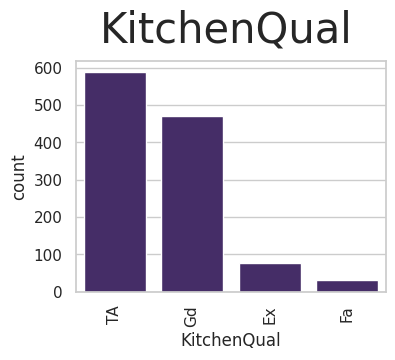

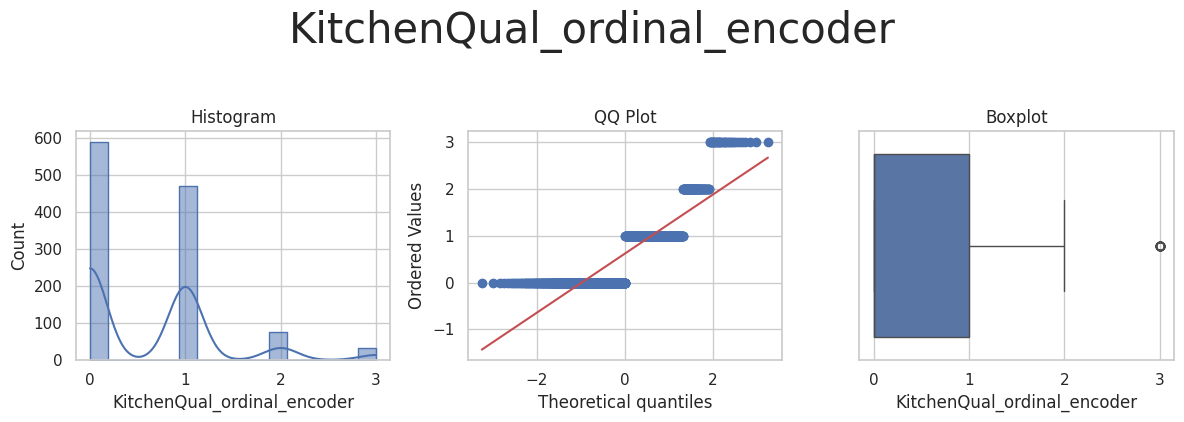

In [13]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

Applies ordinal encoding to categorical variables in both the TrainSet and TestSet using an arbitrary encoding method.

In [14]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.fit_transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


Feature engineering to 1stFlrSF, 2ndFlrSF, GrLivArea, LotArea, LotFrontage, GarageArea, MasVnrArea, OpenPorchSF, TotalBsmtSF

In [15]:
variables_engineering = ['1stFlrSF',
                         '2ndFlrSF',
                         'GrLivArea',
                         'LotArea',
                         'LotFrontage',
                         'GarageArea',
                         'MasVnrArea', 
                         'OpenPorchSF',
                         'TotalBsmtSF',
                         ]

Creates a copy of the 1stFlrSF, 2ndFlrSF, GrLivArea, LotArea, LotFrontage, GarageArea, MasVnrArea, OpenPorchSF, TotalBsmtSF columns from TrainSet and stores it in df_engineering, ensuring that modifications do not affect the original dataset.

In [16]:
df_engineering = TrainSet[variables_engineering].copy()

Applies the FeatureEngineeringAnalysis function to df_engineering with a numerical analysis type.

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



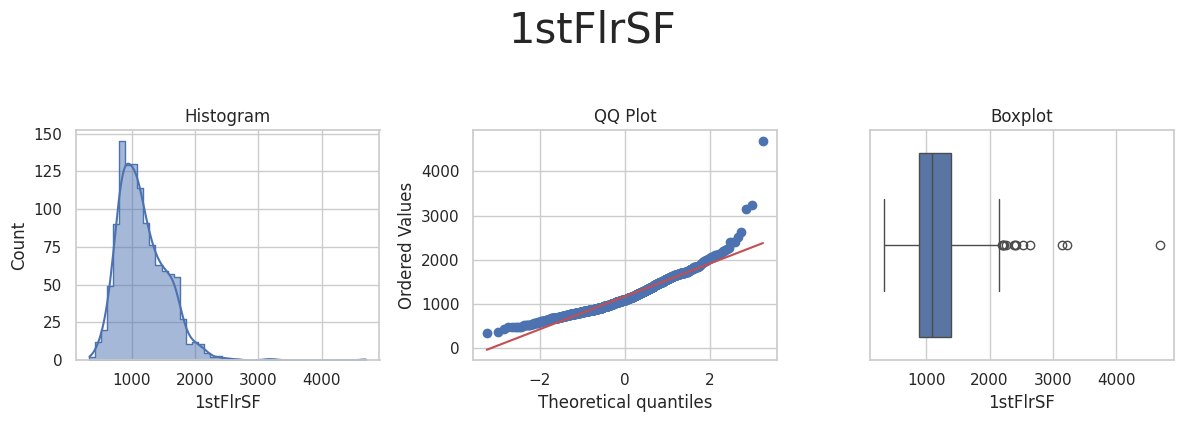

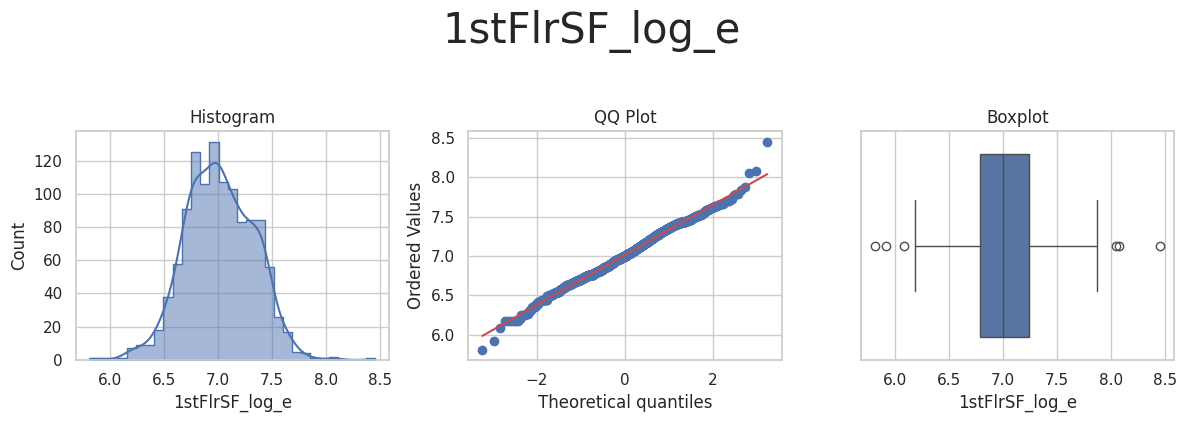

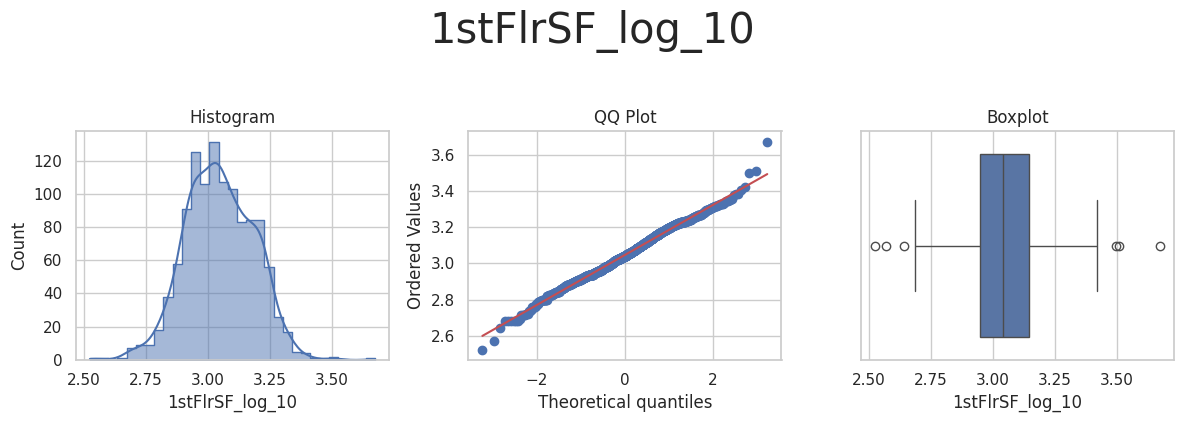

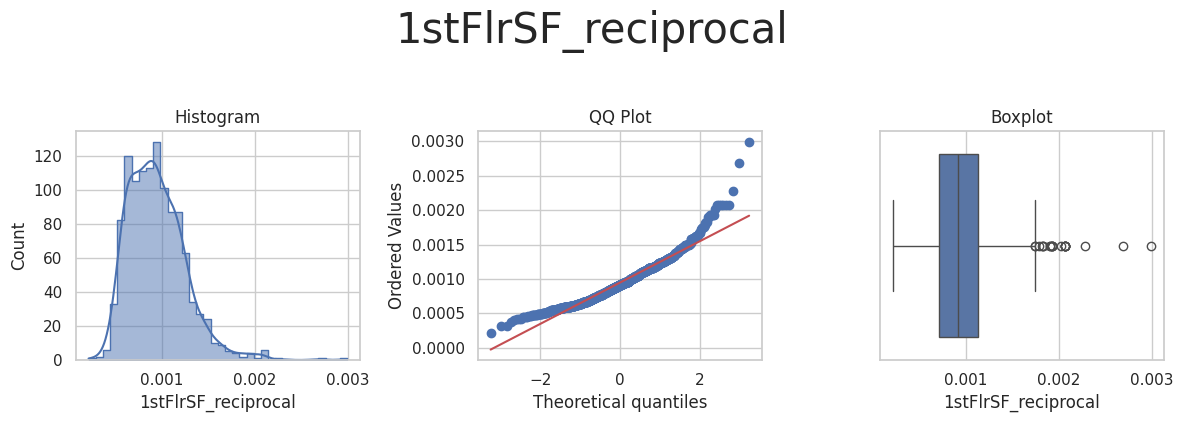

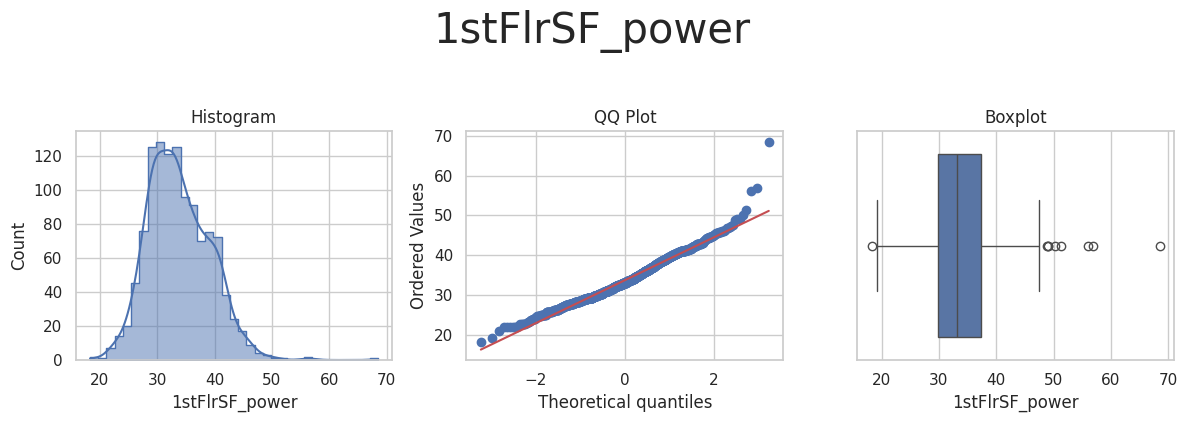

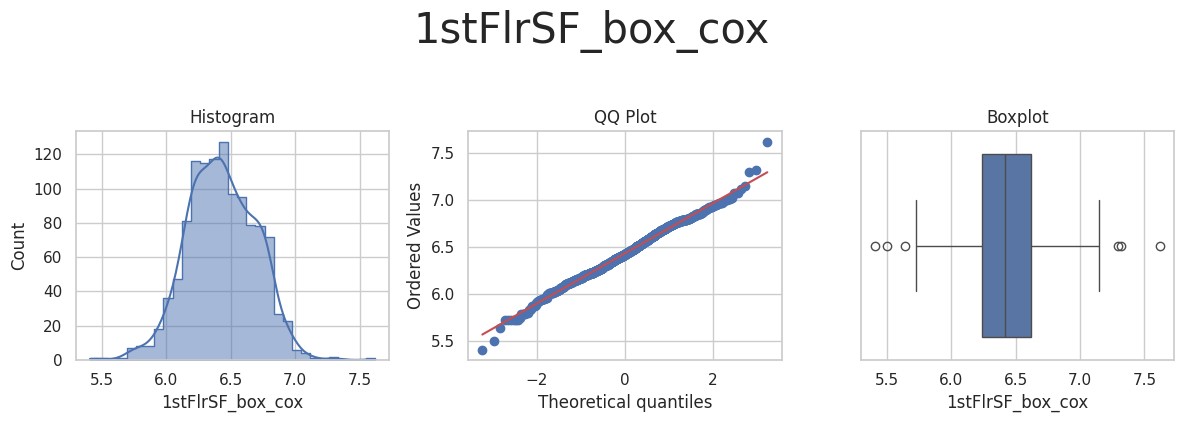

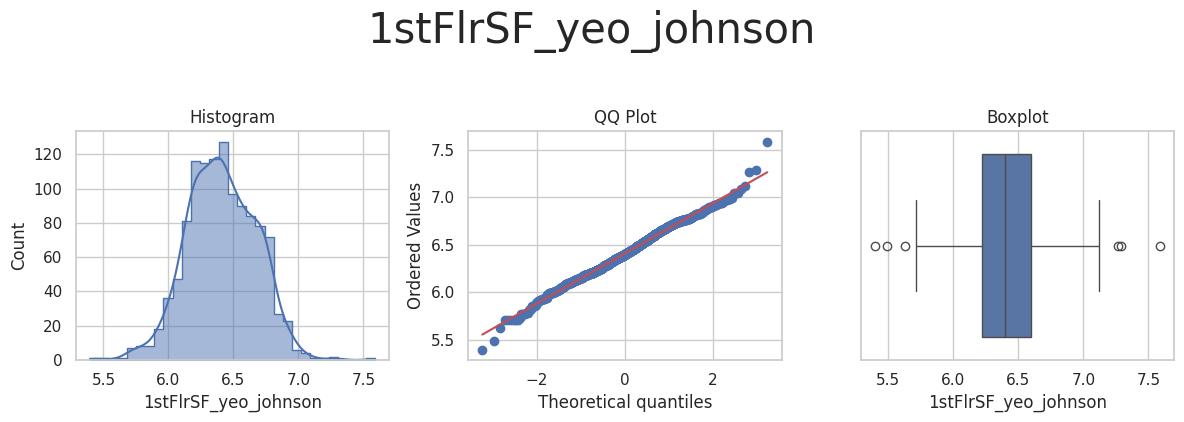



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



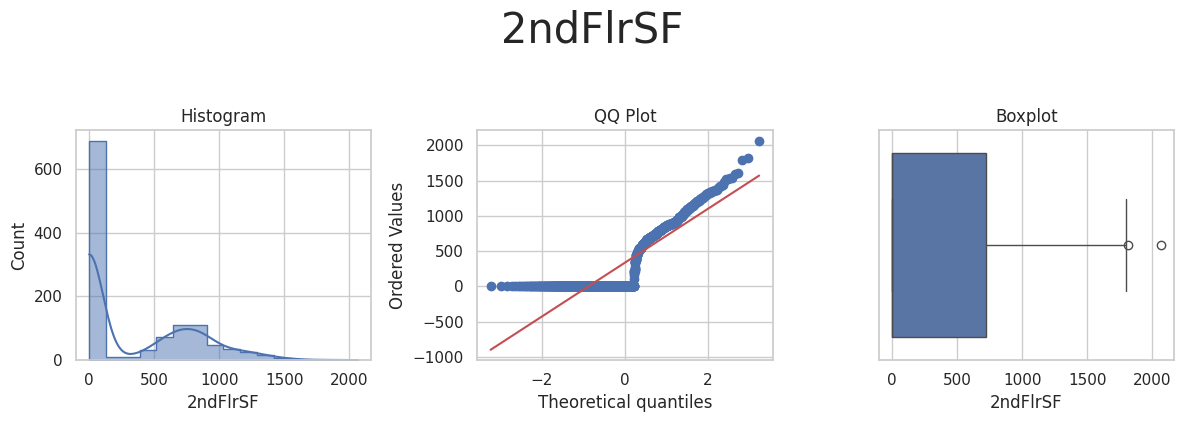

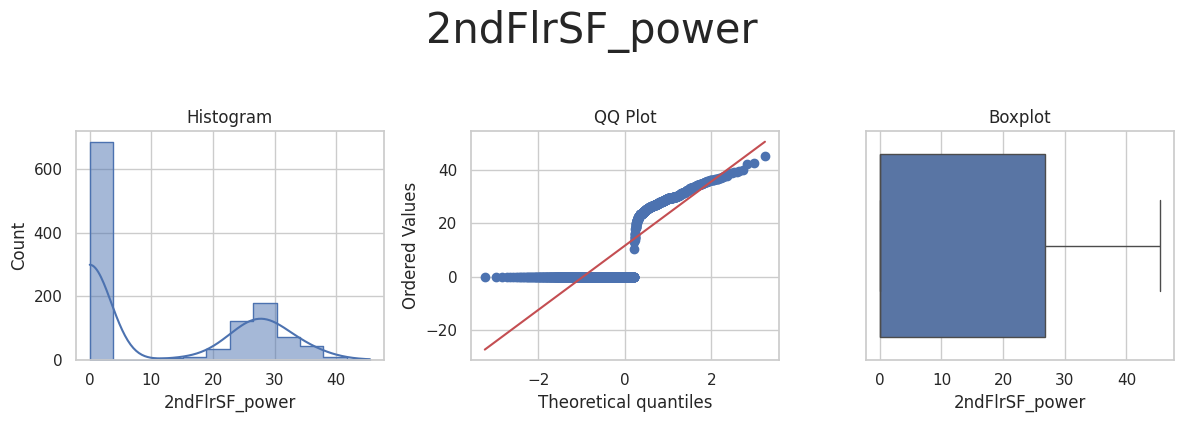

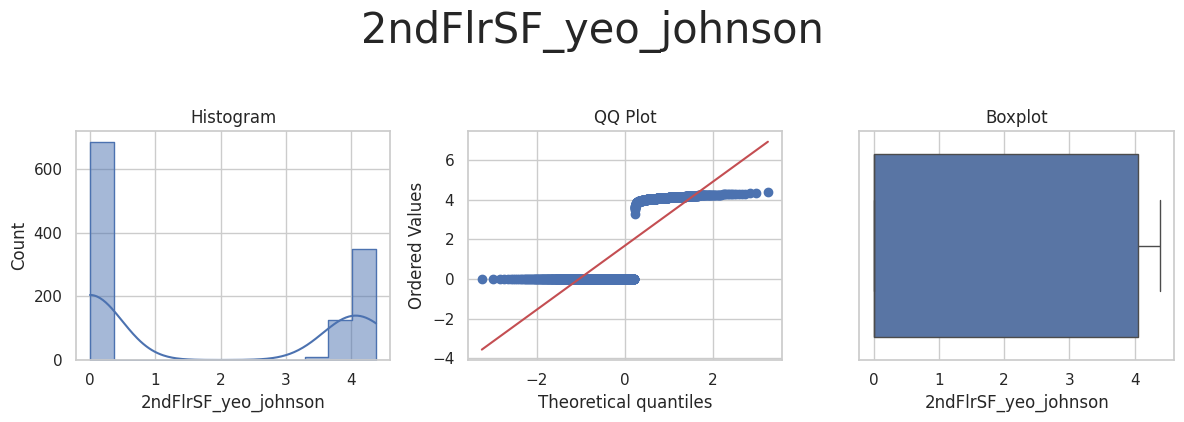



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



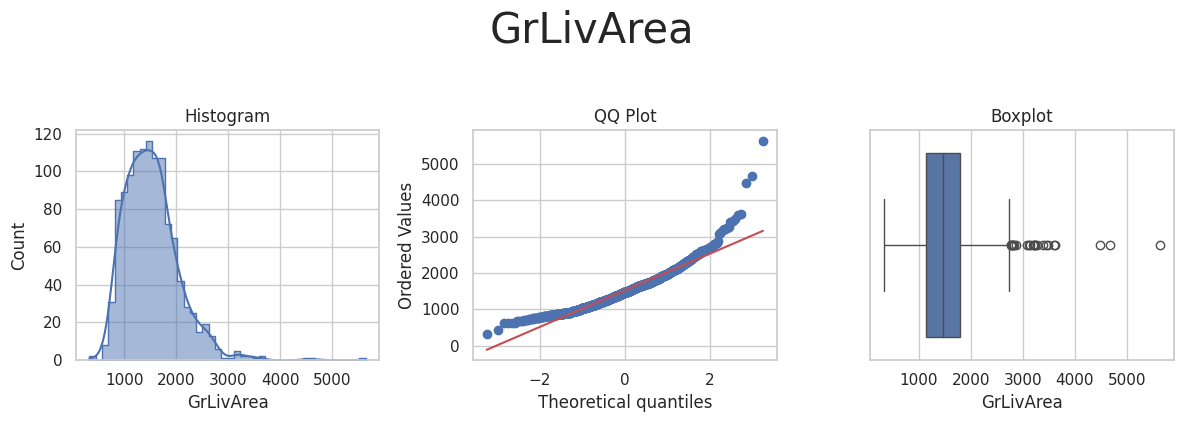

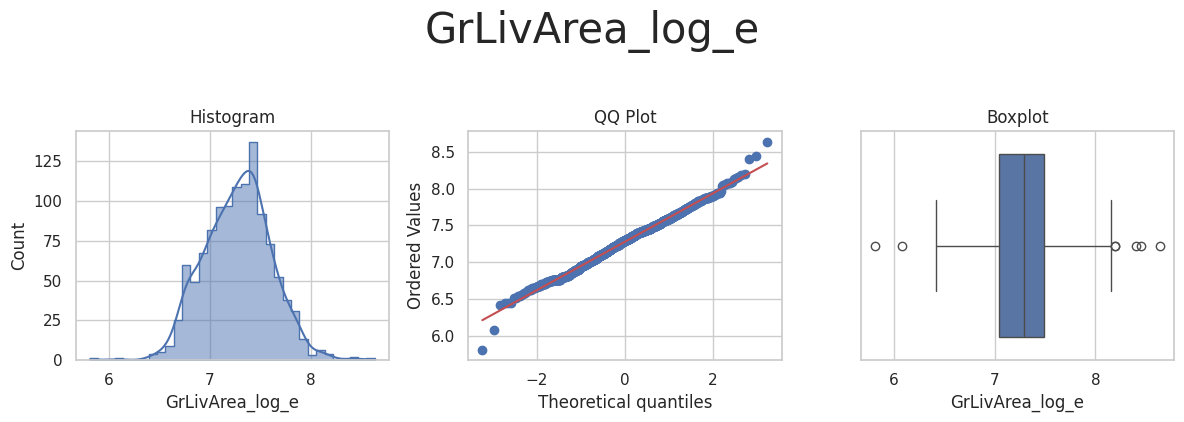

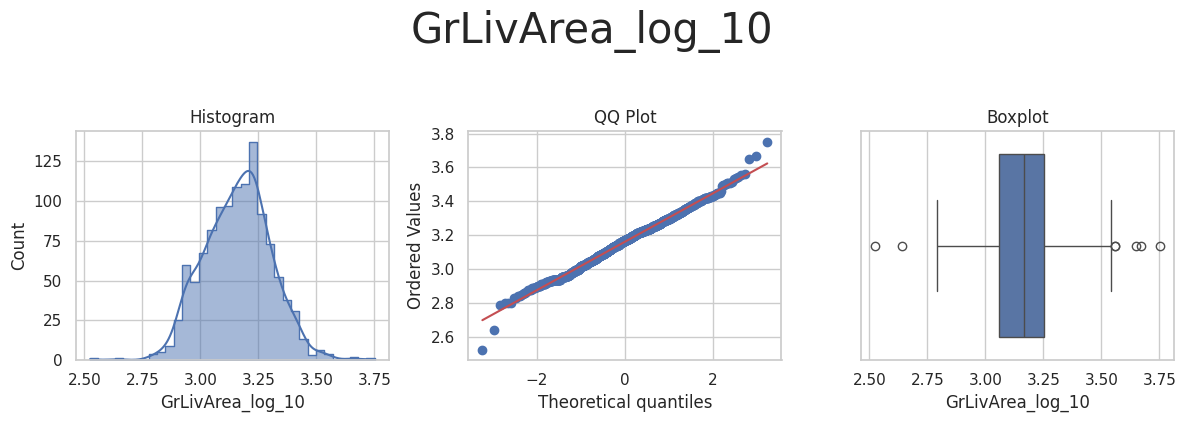

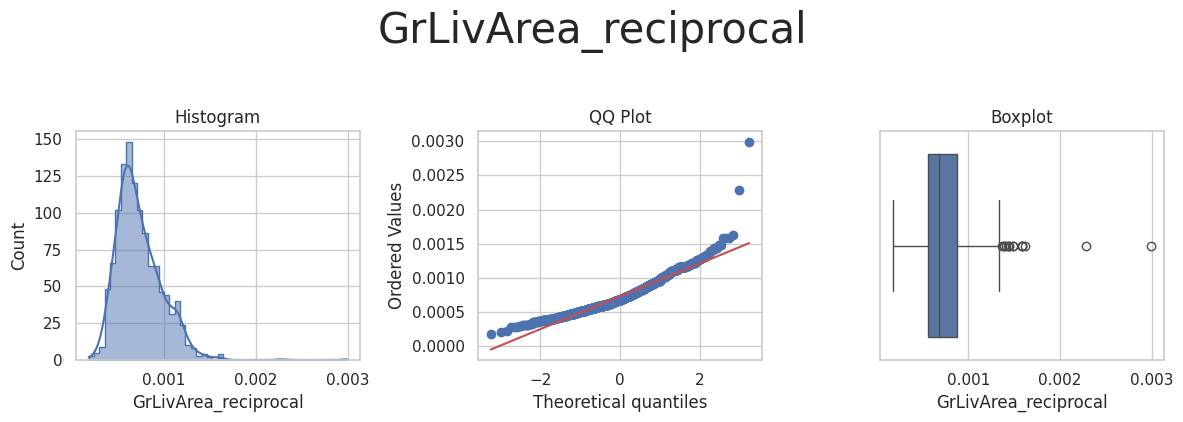

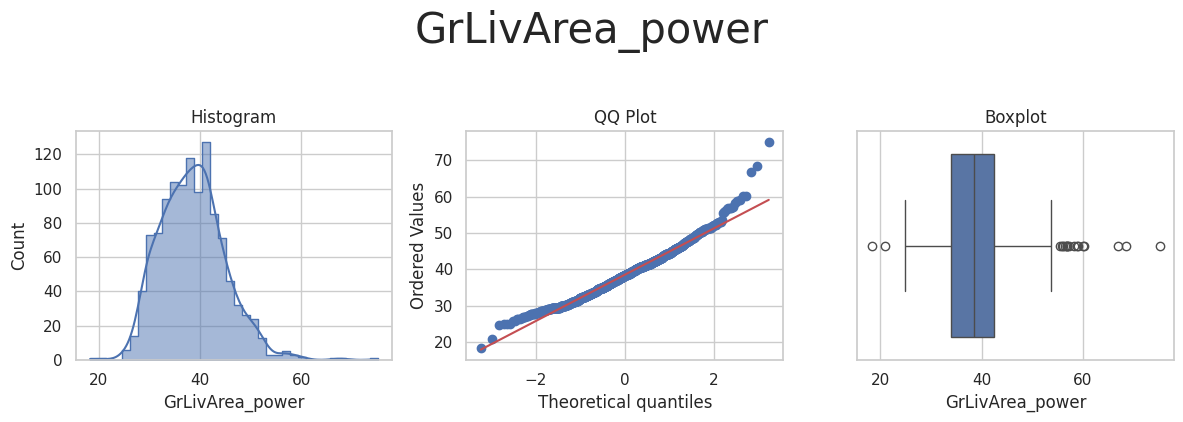

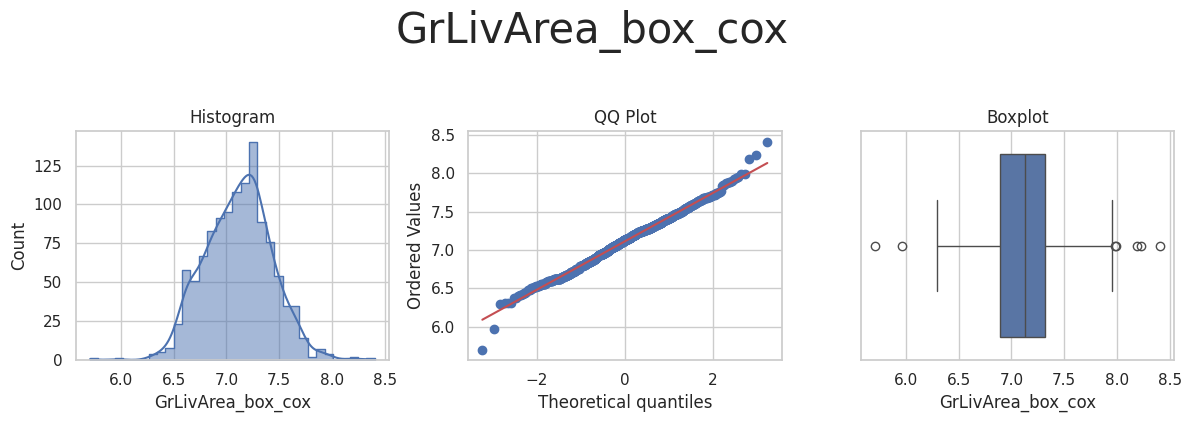

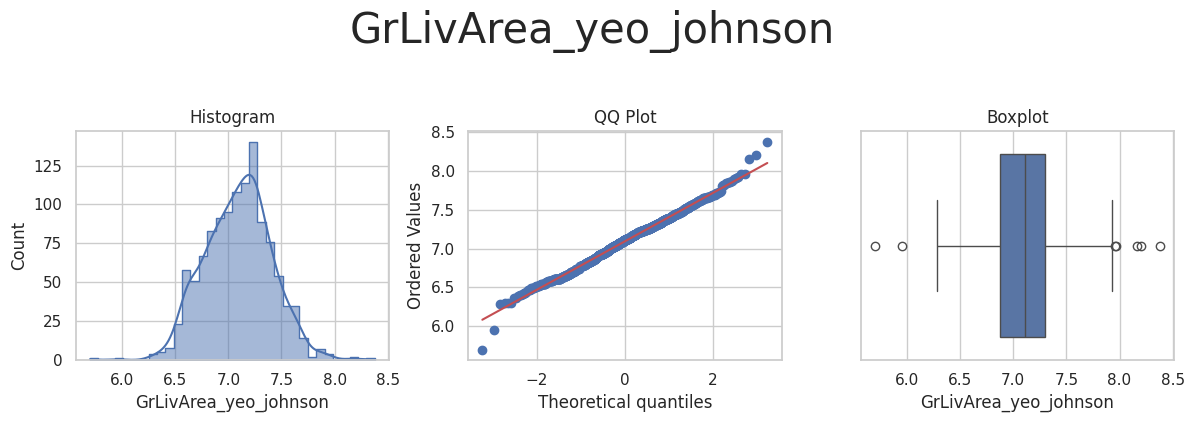



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



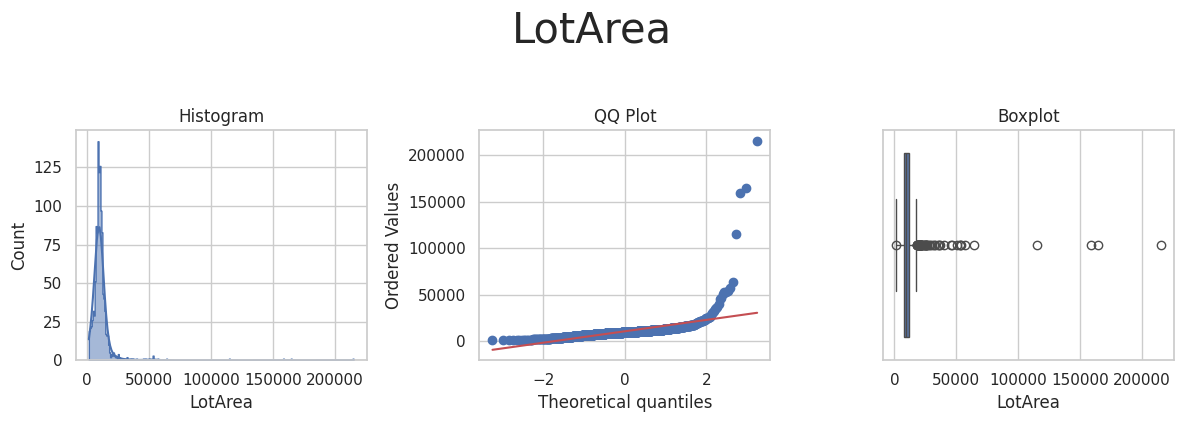

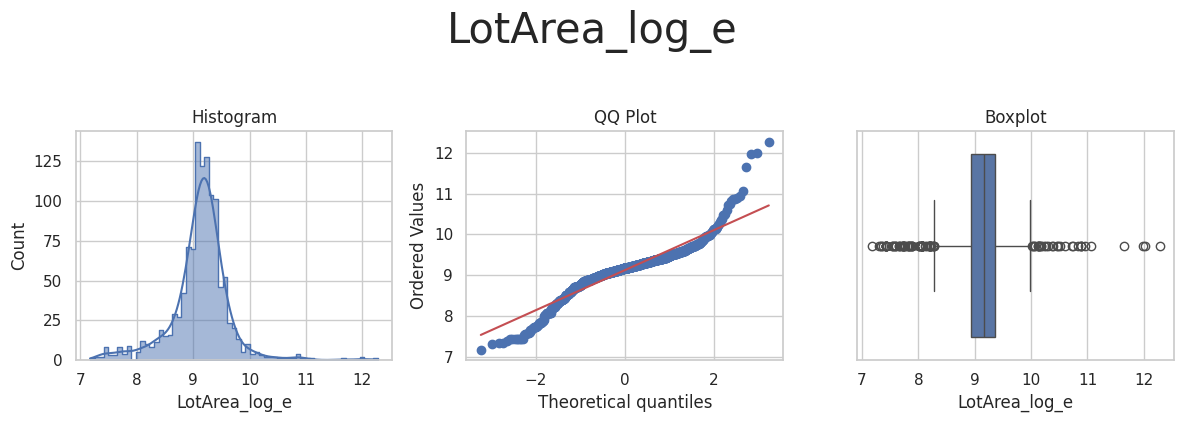

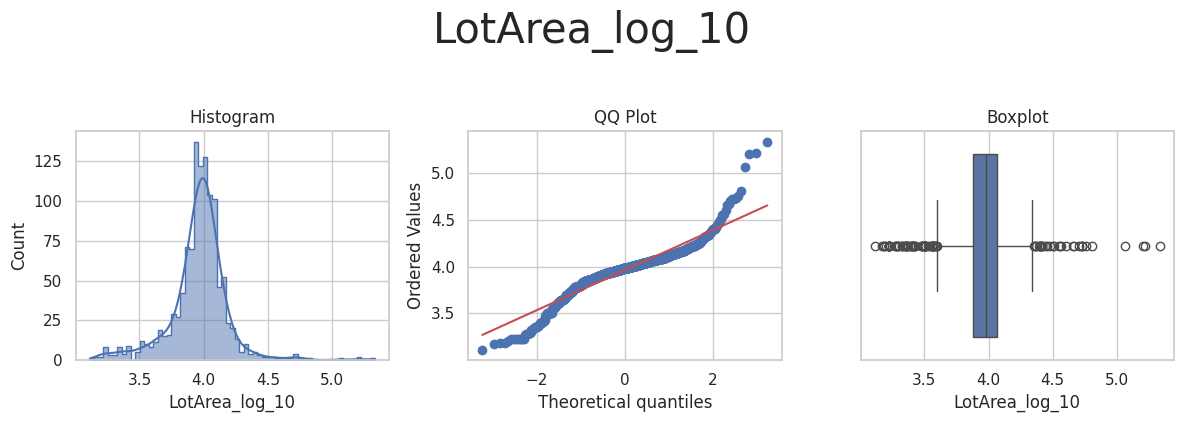

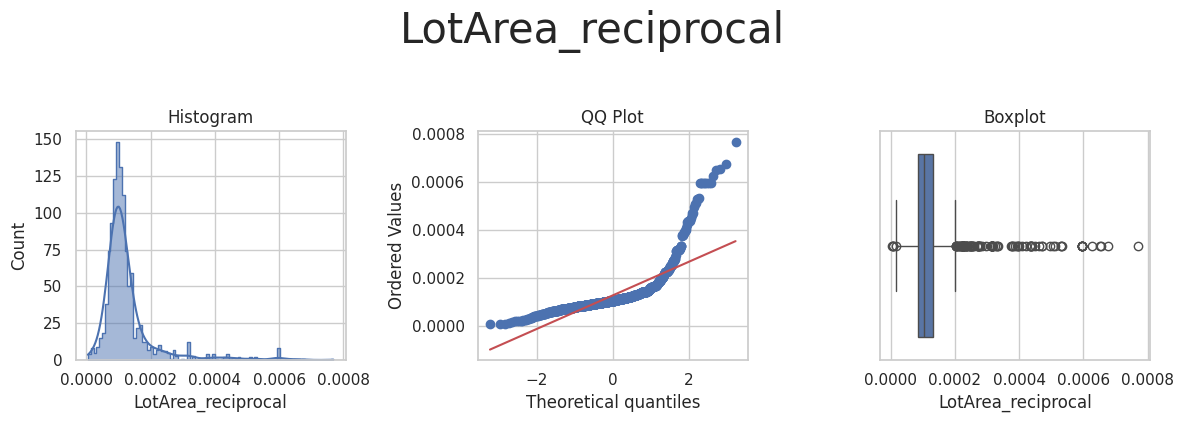

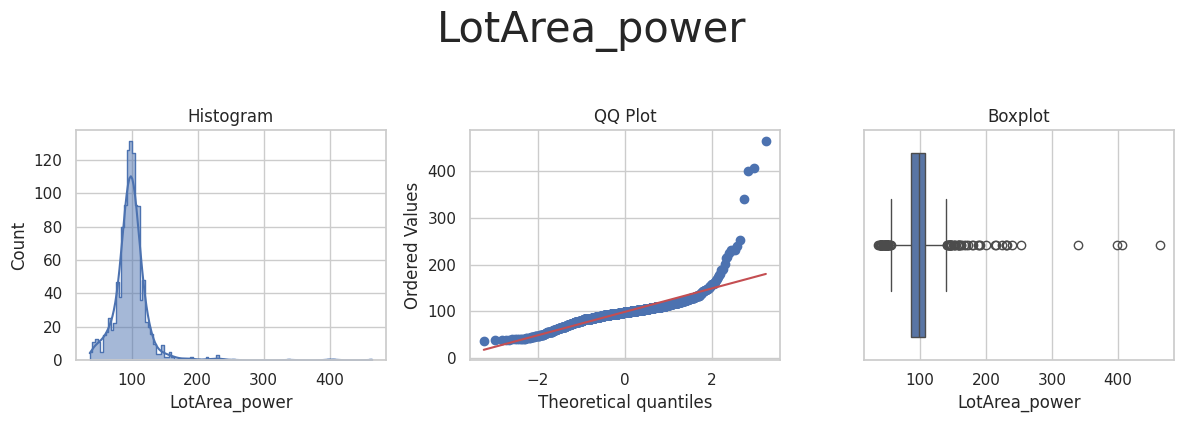

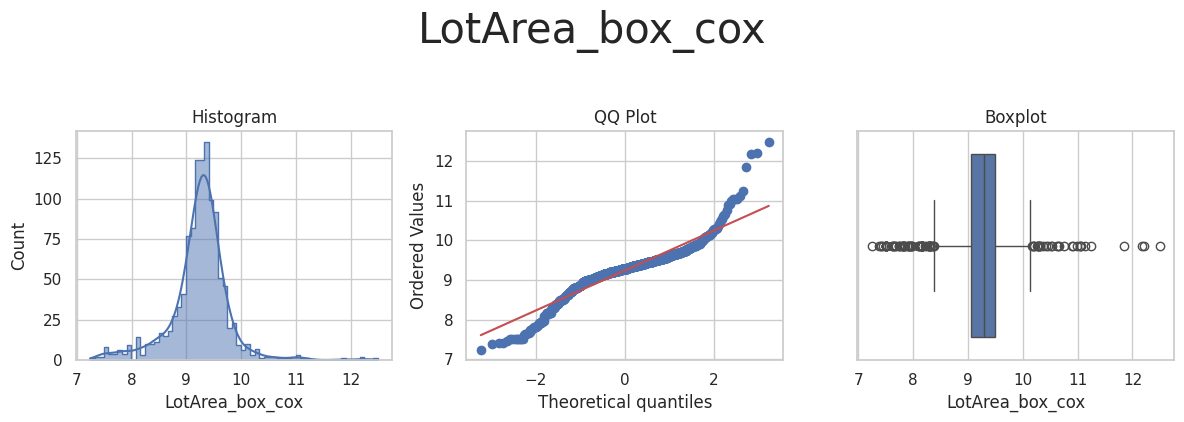

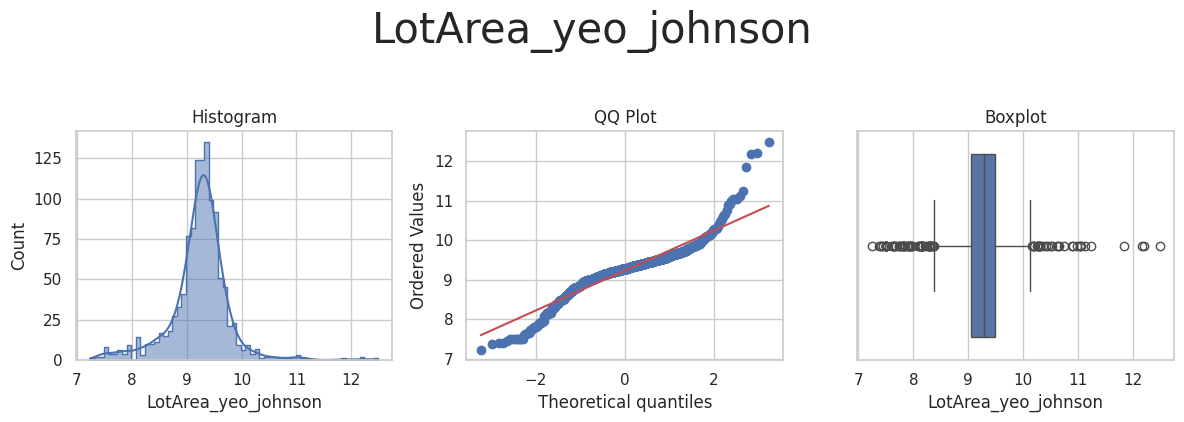



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



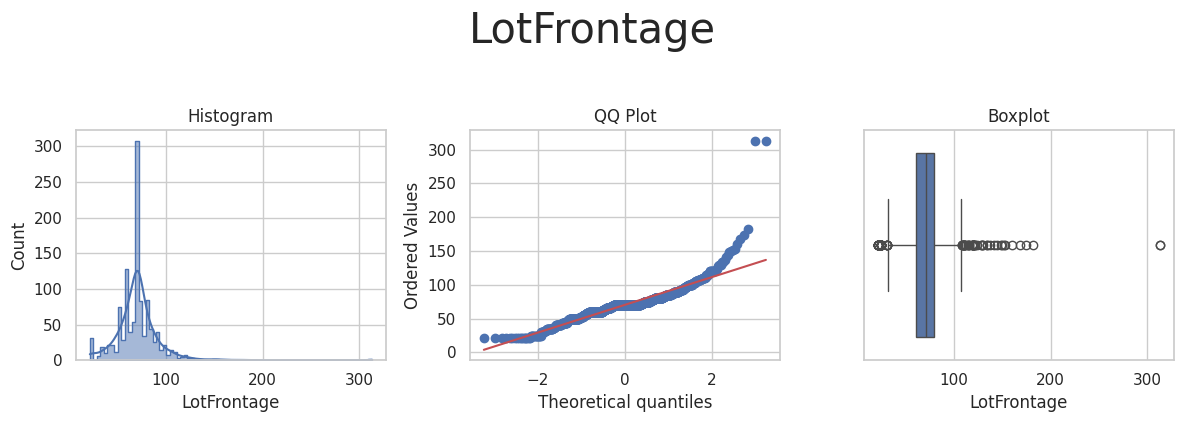

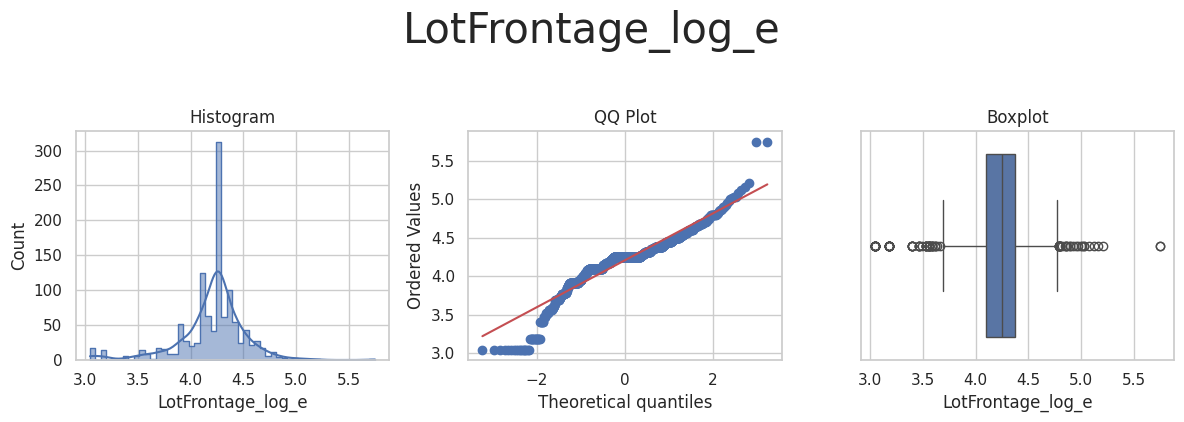

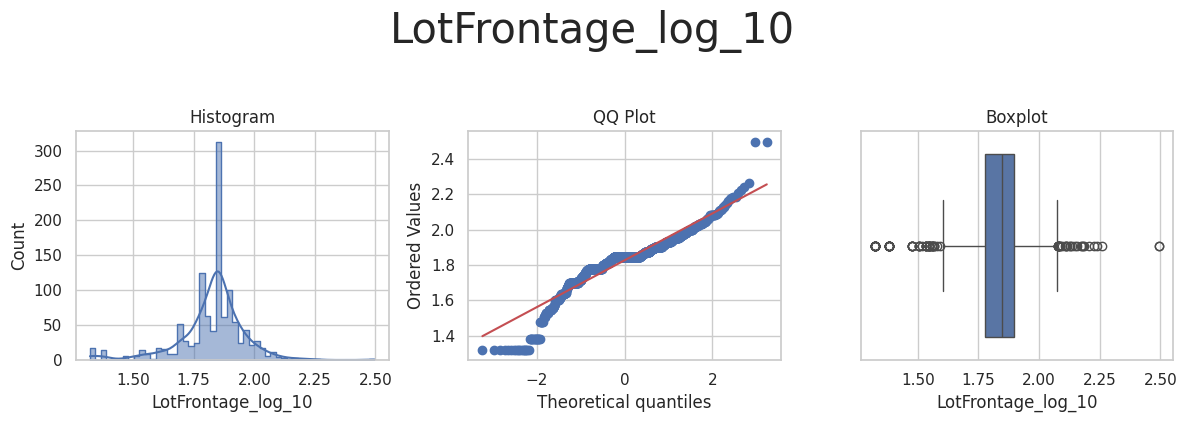

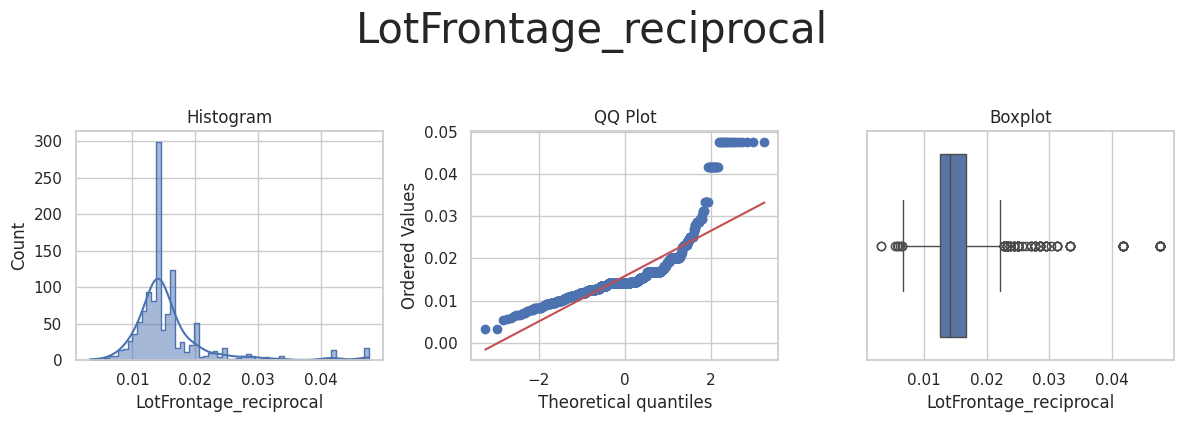

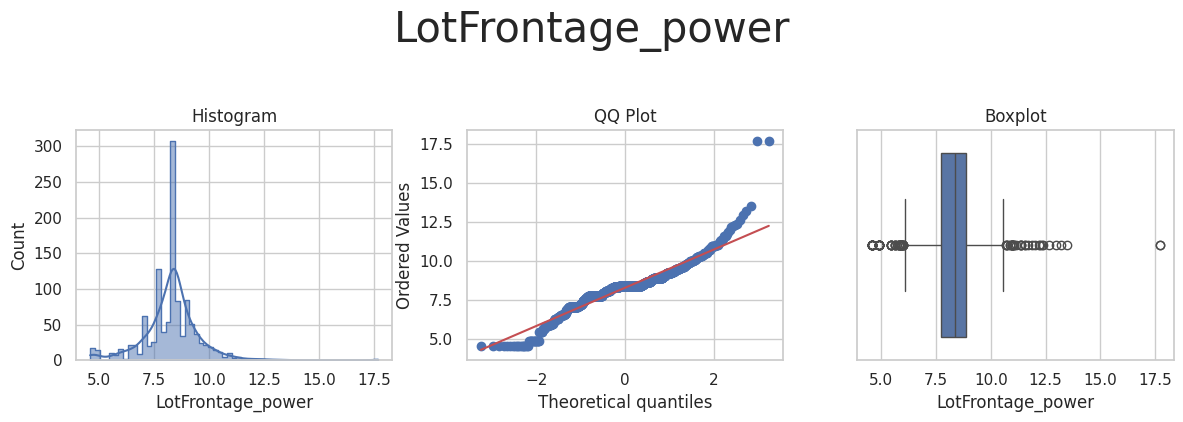

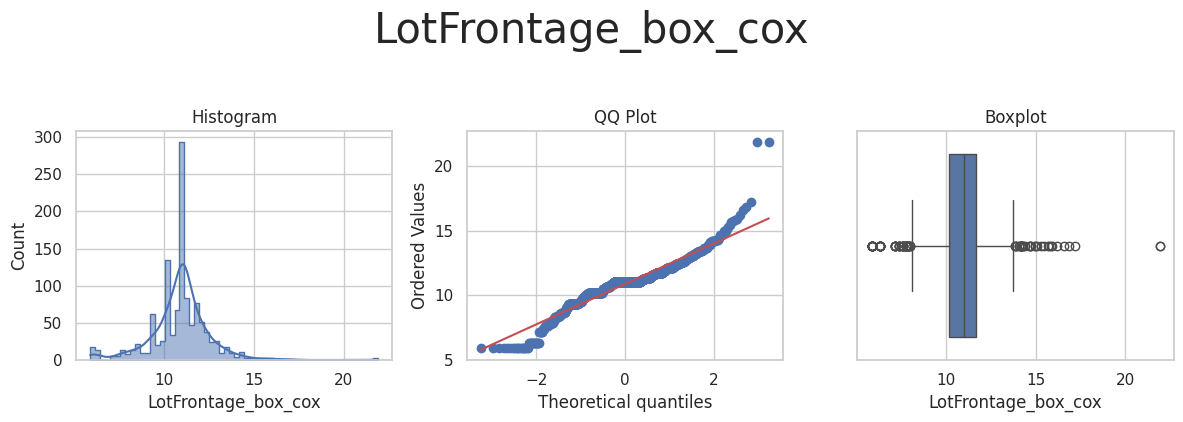

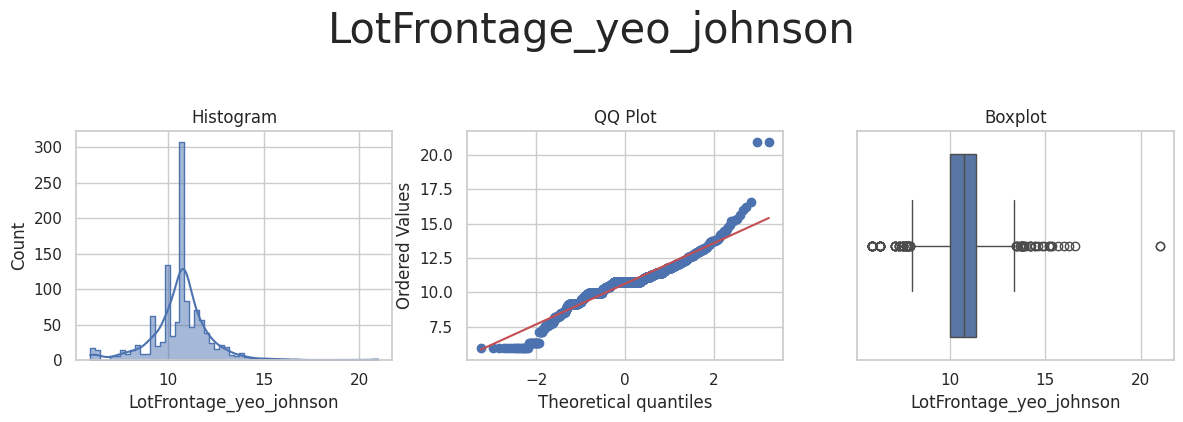



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



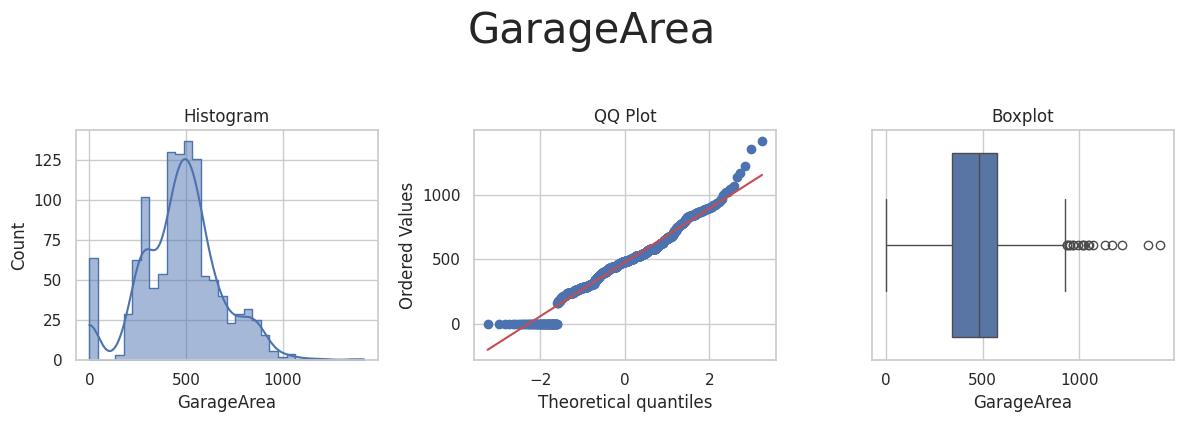

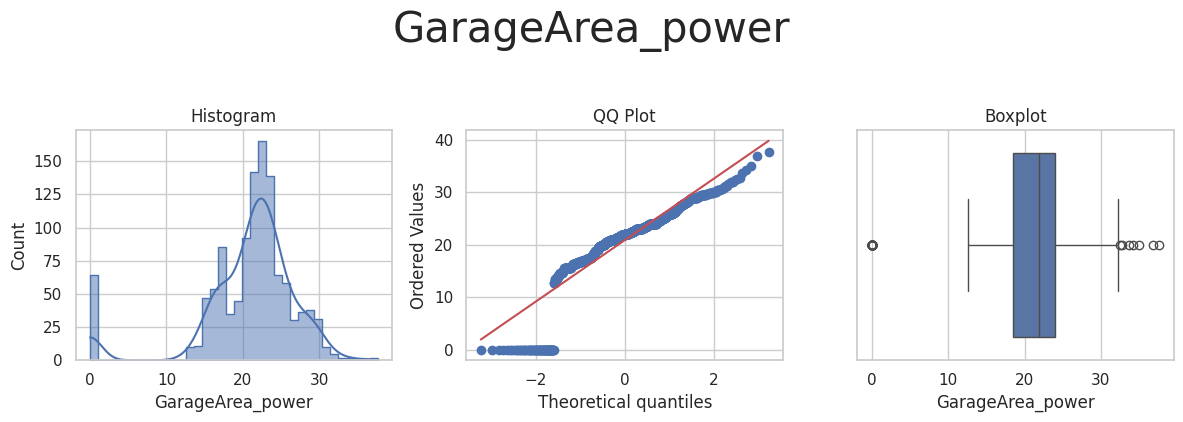

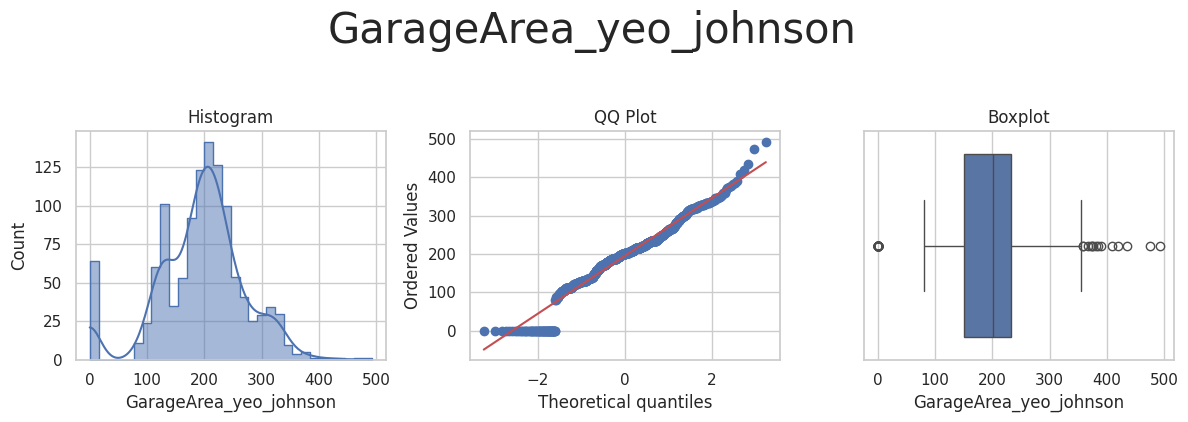



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_power', 'MasVnrArea_yeo_johnson'] 



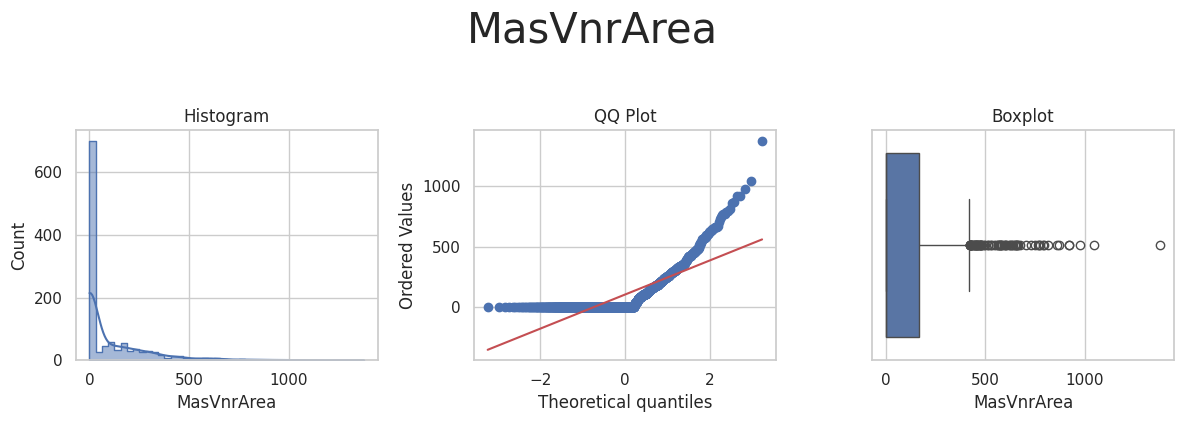

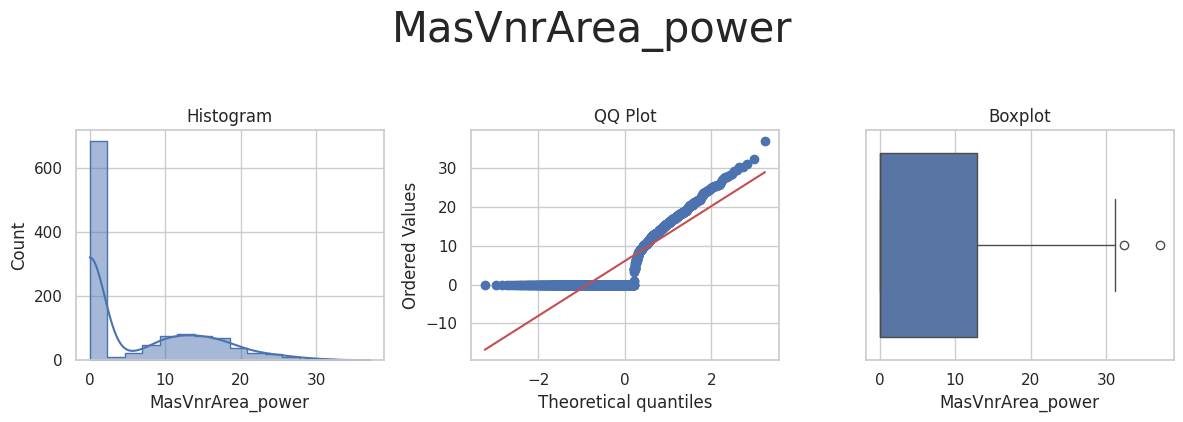

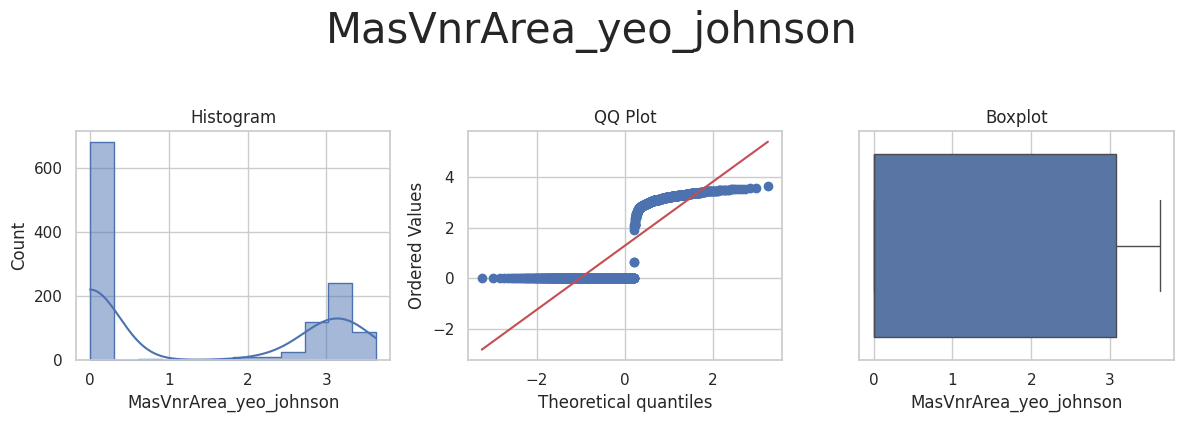



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_power', 'OpenPorchSF_yeo_johnson'] 



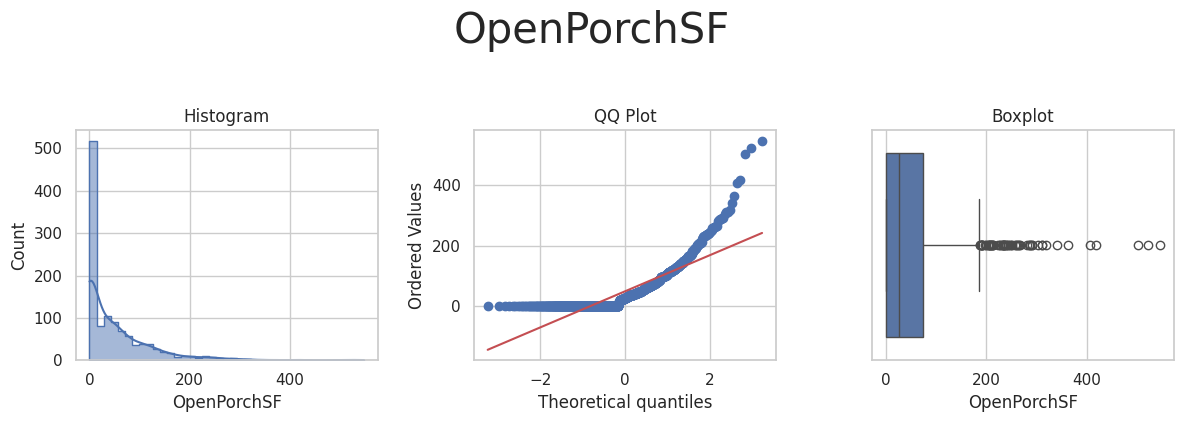

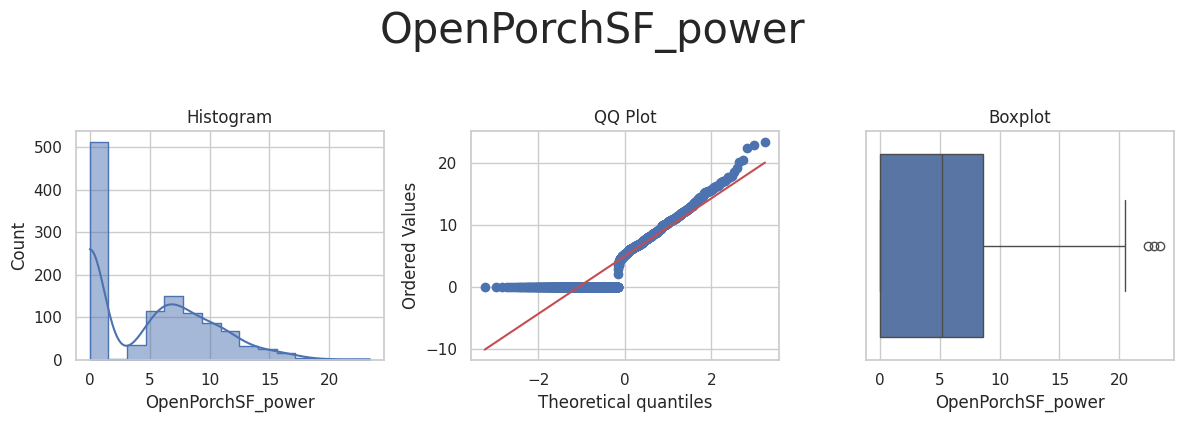

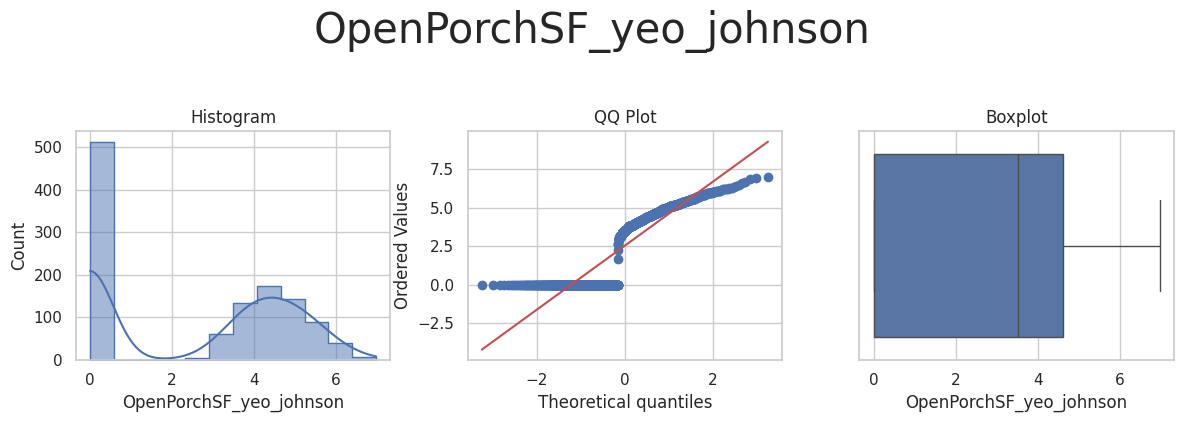



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



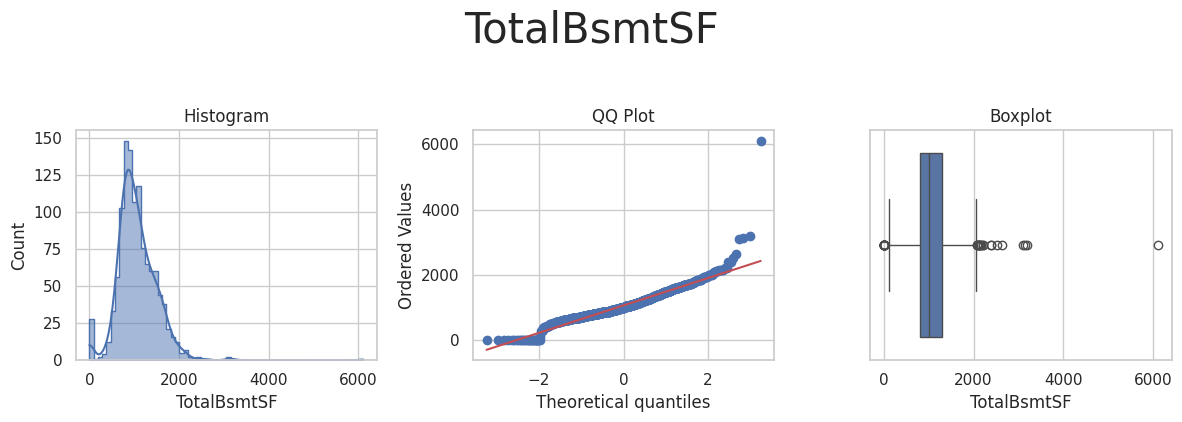

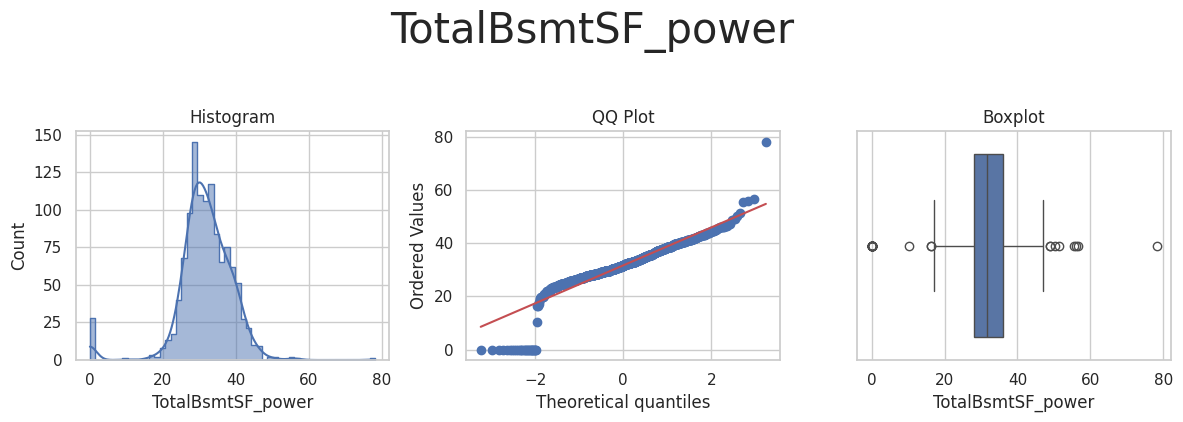

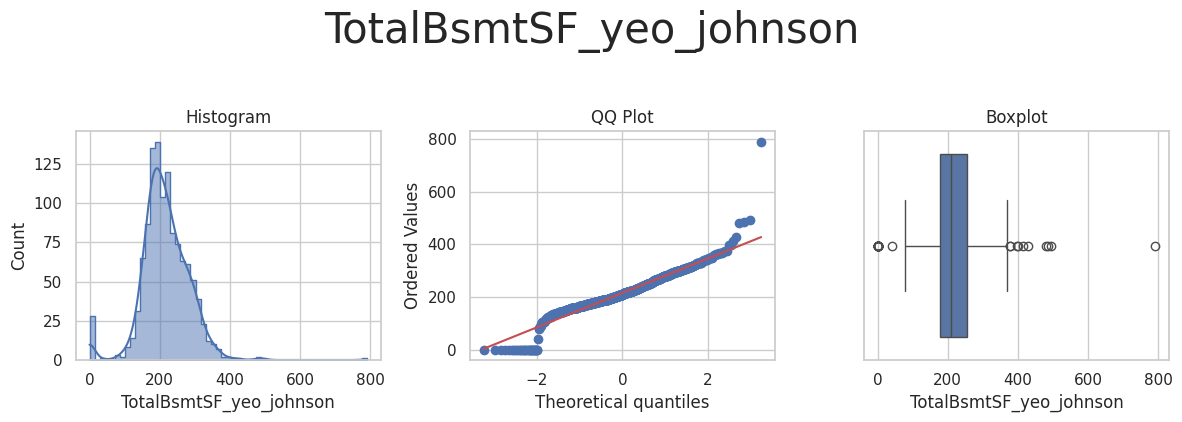

In [17]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

Log Transformation is applied to the columns GrLivArea, LotArea, and LotFrontage to address skewness in the data by compressing large values. Power Transformation is applied to the columns GarageArea, MasVnrArea, OpenPorchSF, TotalBsmtSF, 1stFlrSF, and 2ndFlrSF to stabilize variance and make the data more normally distributed.

In [18]:
lt = vt.LogTransformer(variables=['GrLivArea', 'LotArea', 'LotFrontage'])
pt = vt.PowerTransformer(variables=['GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])

TrainSet = lt.fit_transform(TrainSet)
TestSet = lt.transform(TestSet)

TrainSet = pt.fit_transform(TrainSet)
TestSet = pt.transform(TestSet)

print("* Power Transformation and Log Transformation done!")

* Power Transformation and Log Transformation done!


Feature engineering to 1stFlrSF, 2ndFlrSF, GarageArea, LotArea, LotFrontage, MasVnrArea, OpenPorchSF, TotalBsmtSF

In [19]:
variables_engineering = ['1stFlrSF', '2ndFlrSF', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF']

Creates a copy of the 1stFlrSF, 2ndFlrSF, GarageArea, LotArea, LotFrontage, MasVnrArea, OpenPorchSF, TotalBsmtSF columns from TrainSet and stores it in df_engineering, ensuring that modifications do not affect the original dataset.

In [20]:
df_engineering = TrainSet[variables_engineering].copy()

Applies the FeatureEngineeringAnalysis function to df_engineering with a outlier_winsorizer analysis type.

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_iqr'] 



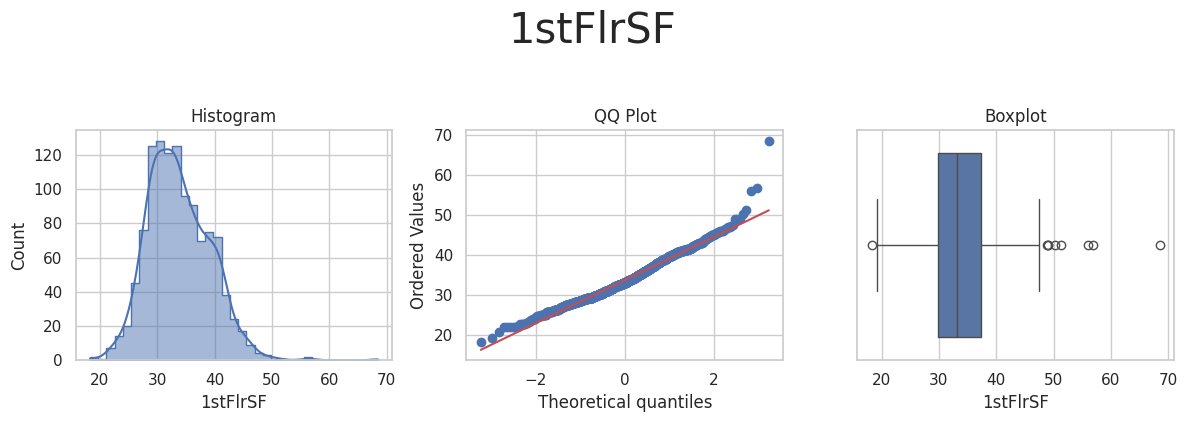

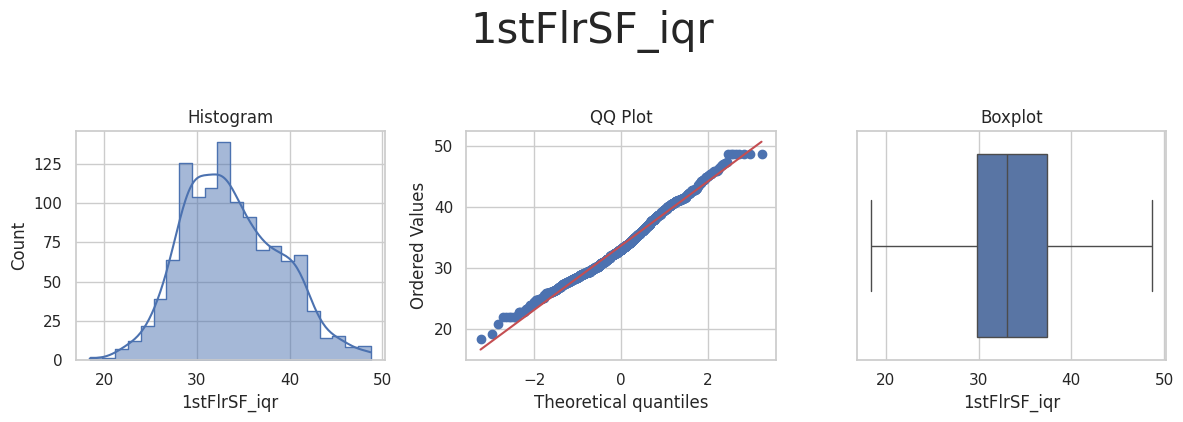



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_iqr'] 



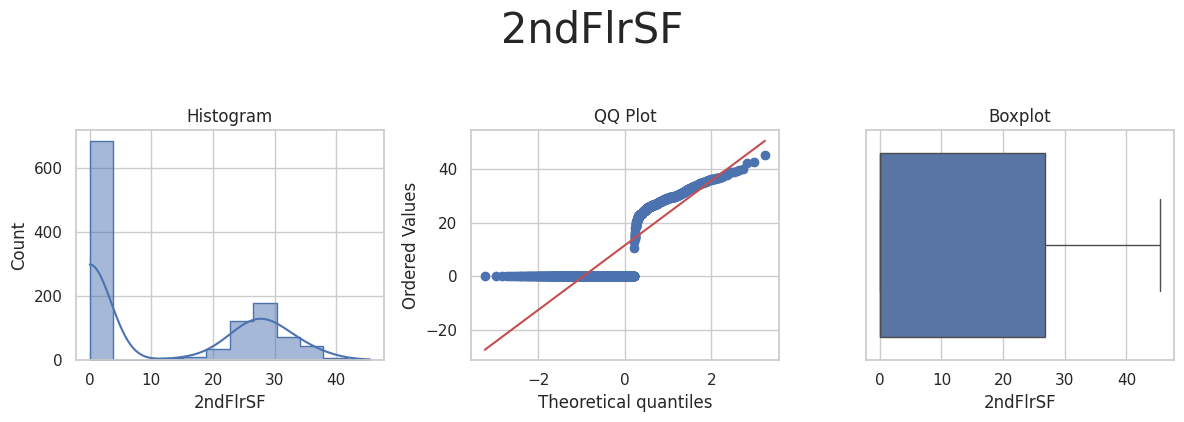

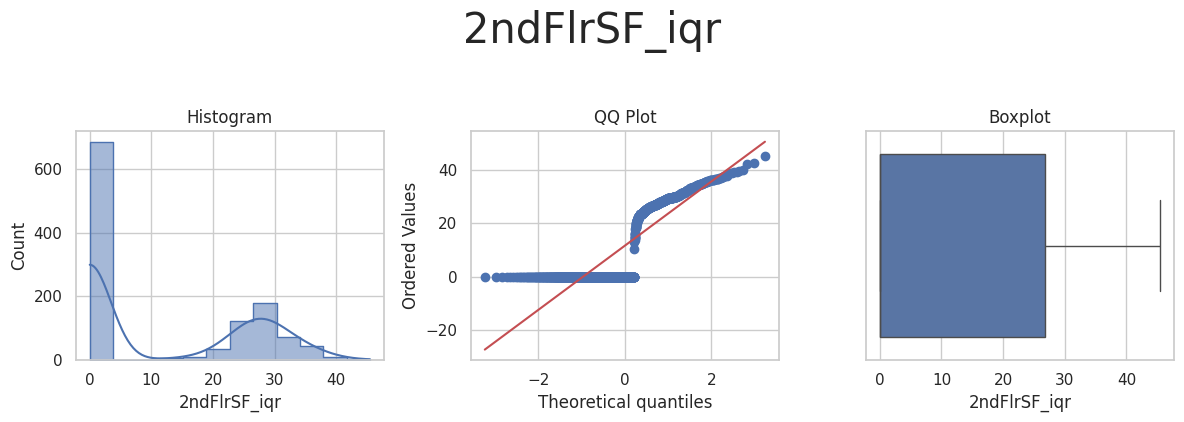



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_iqr'] 



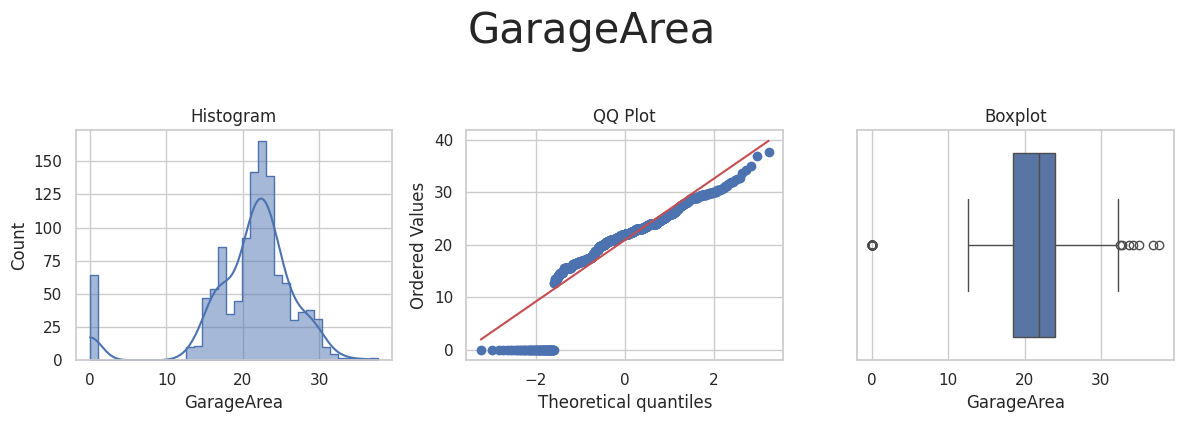

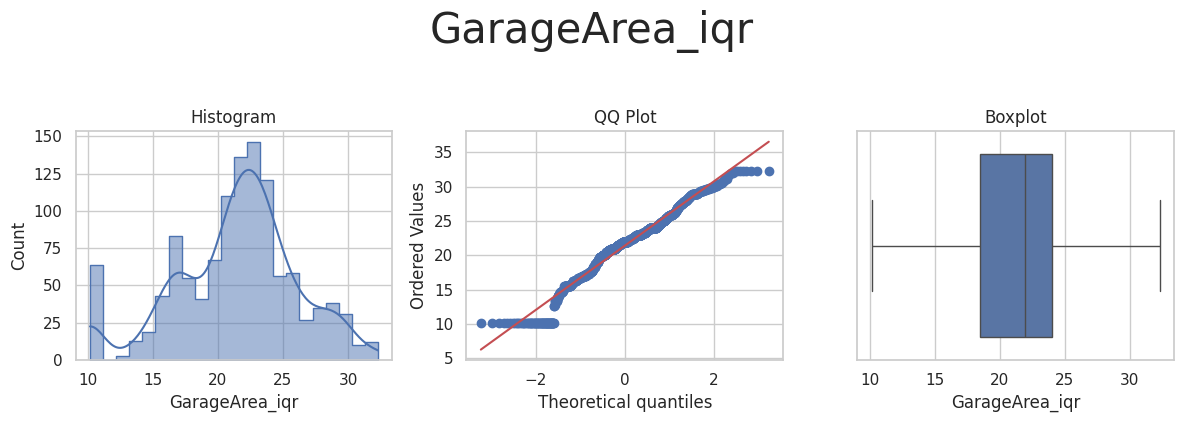



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_iqr'] 



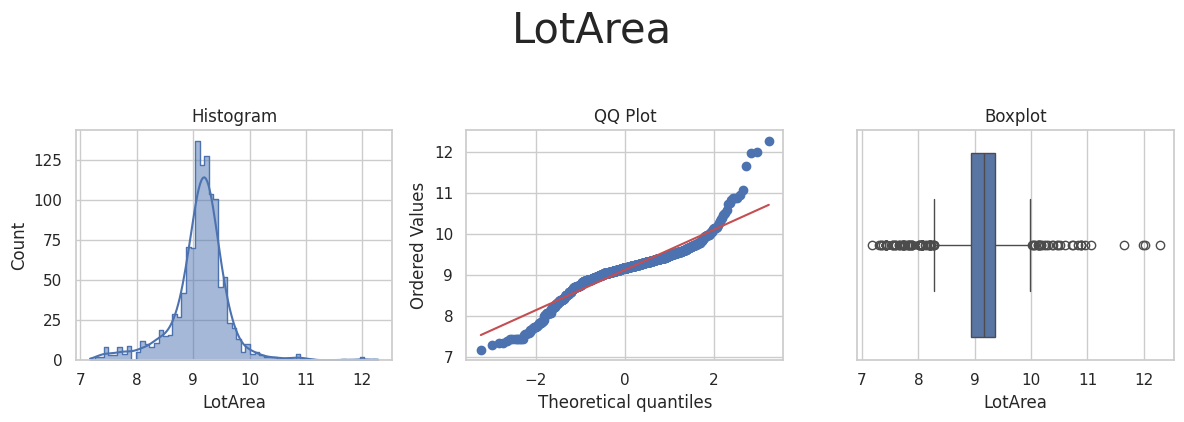

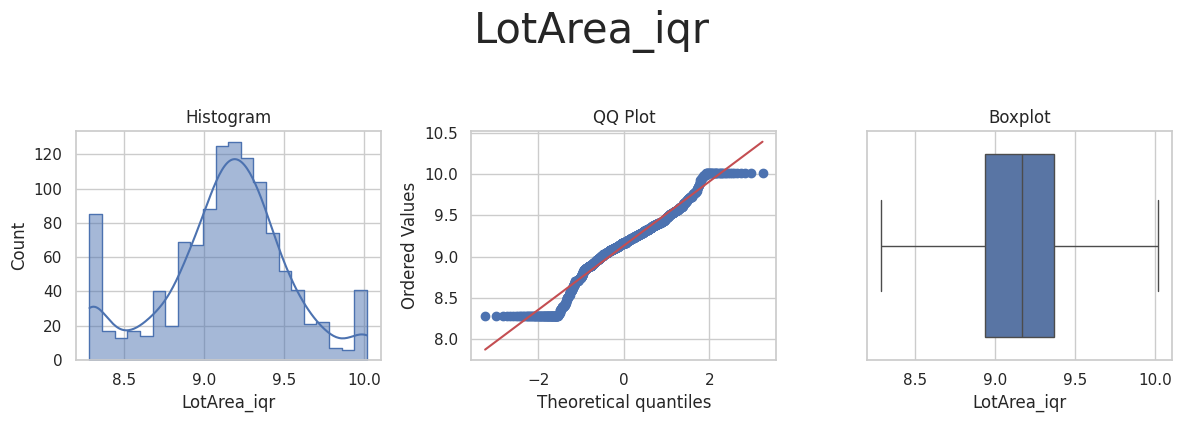



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_iqr'] 



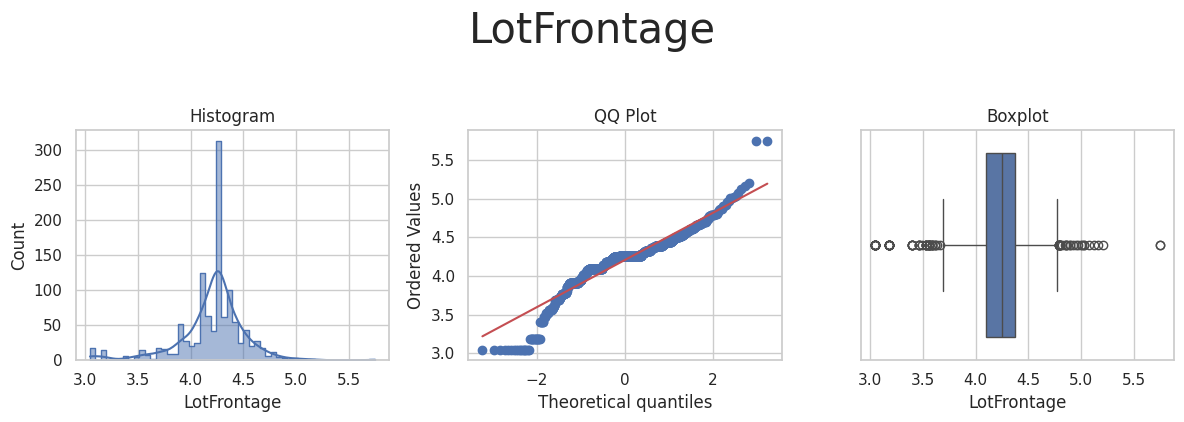

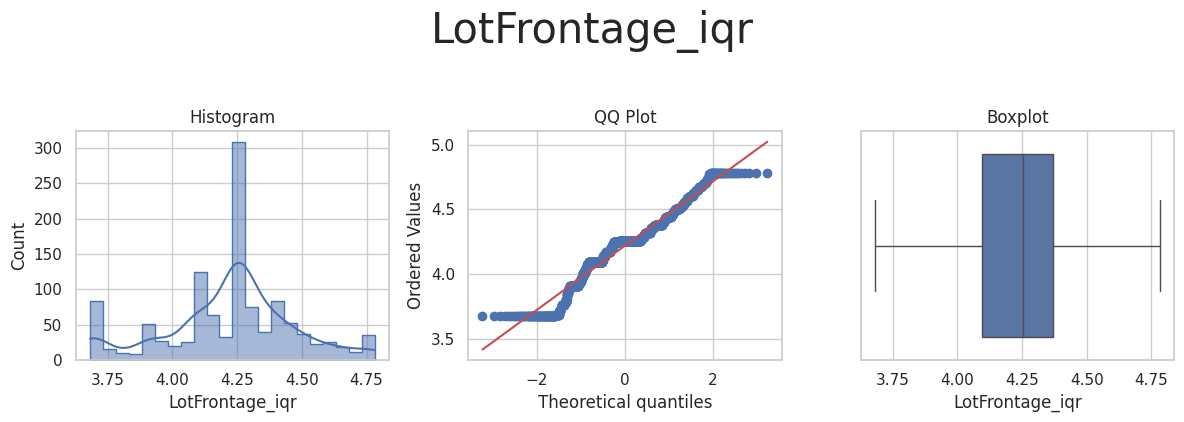



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_iqr'] 



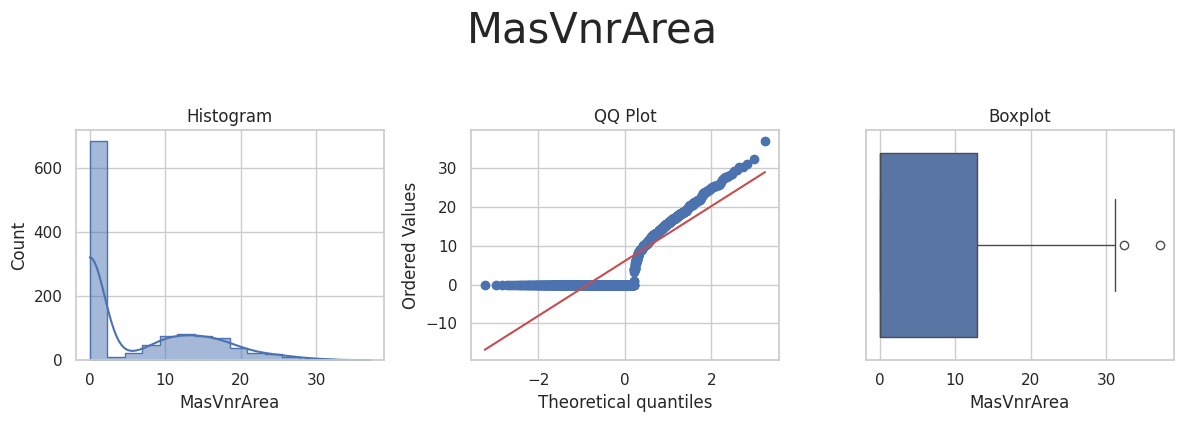

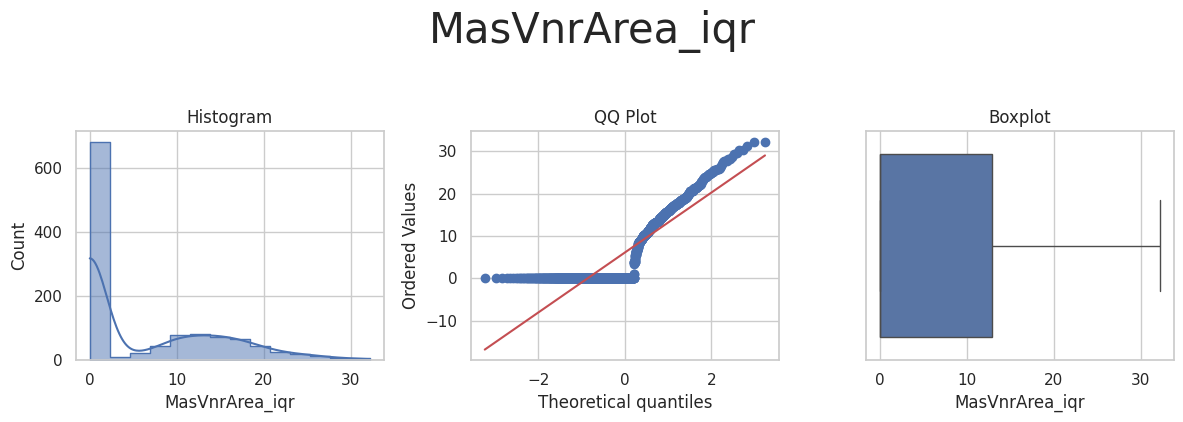



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_iqr'] 



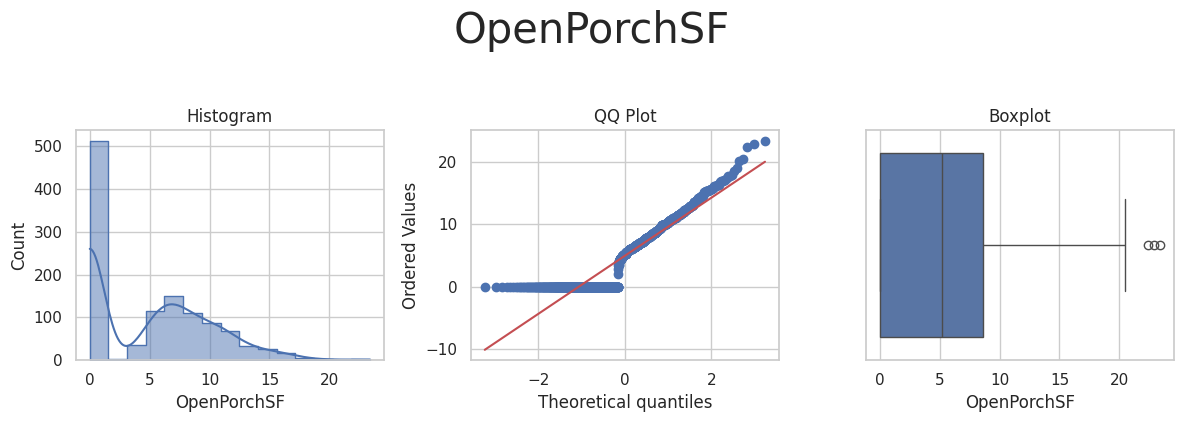

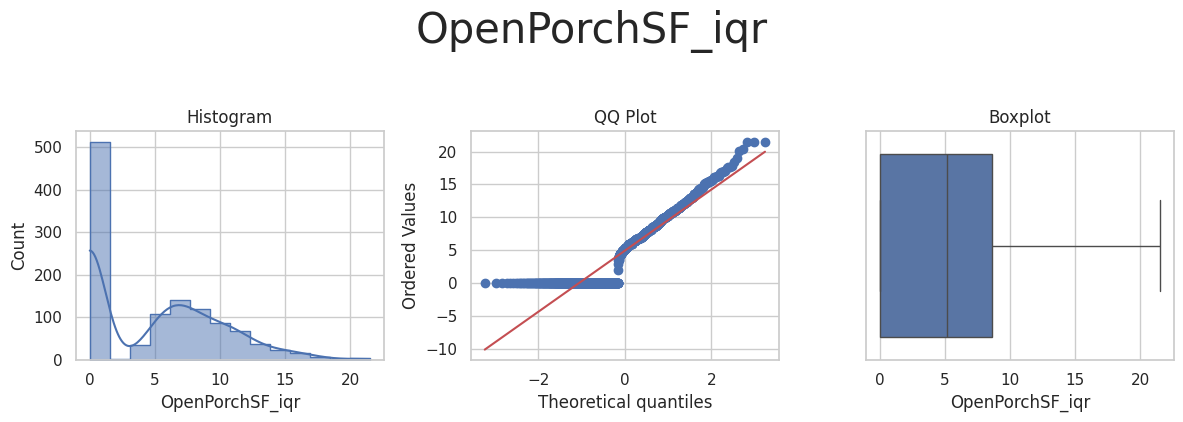



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_iqr'] 



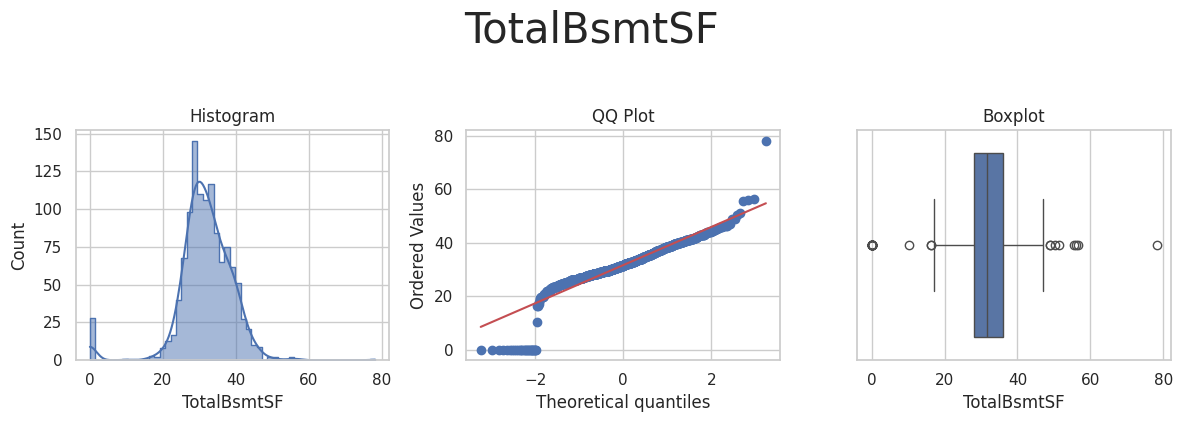

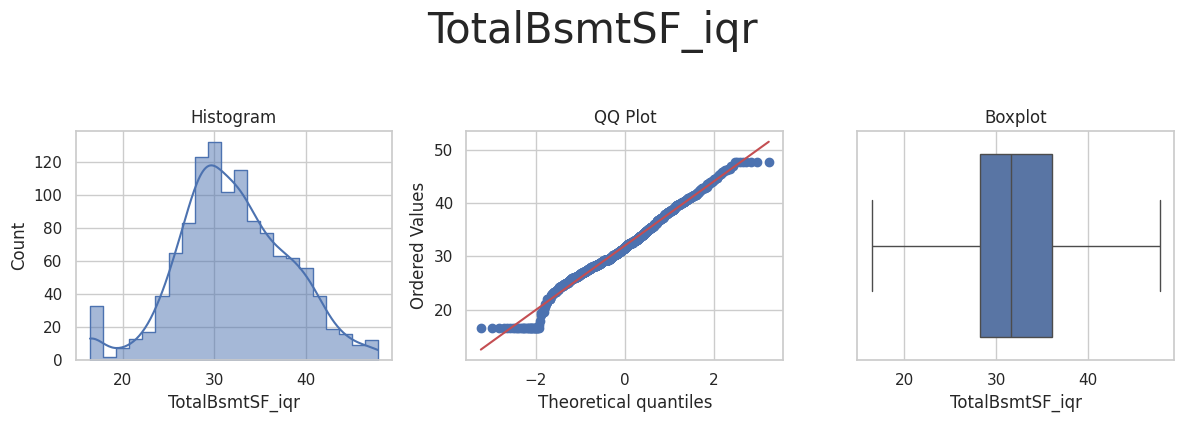

In [21]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='outlier_winsorizer')

Applies Winsorization to handle outliers in the TrainSet and TestSet using the IQR method. It caps extreme values at 1.5 times the IQR for both tails and specified variables.

In [22]:
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables = variables_engineering)
TrainSet = winsoriser.fit_transform(TrainSet)
TestSet = winsoriser.fit_transform(TestSet)

print("* Outlier winsoriser transformation done!")

* Outlier winsoriser transformation done!


Remove highly correlated features (correlation > 0.8) based on their variance, stores the correlated feature sets in corr_sel.correlated_feature_sets_

In [23]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', '1stFlrSF_iqr', 'TotalBsmtSF', 'TotalBsmtSF_iqr'},
 {'2ndFlrSF', '2ndFlrSF_iqr'},
 {'GarageArea', 'GarageArea_iqr'},
 {'LotArea', 'LotArea_iqr'},
 {'LotFrontage', 'LotFrontage_iqr'},
 {'MasVnrArea', 'MasVnrArea_iqr'},
 {'OpenPorchSF', 'OpenPorchSF_iqr'}]

The names of features that are dropped due to high correlation with others.

In [24]:
corr_sel.features_to_drop_

['1stFlrSF',
 '1stFlrSF_iqr',
 '2ndFlrSF_iqr',
 'GarageArea_iqr',
 'LotArea_iqr',
 'LotFrontage_iqr',
 'MasVnrArea_iqr',
 'OpenPorchSF_iqr',
 'TotalBsmtSF_iqr']

## Conclusions and Next Steps

The categorical variable KitchenQual was encoded using ordinal encoding, allowing the model to recognize the inherent ranking among kitchen quality levels.
Log and power transformations were applied to numerical features (GrLivArea, LotArea, LotFrontage, GarageArea, MasVnrArea, OpenPorchSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF) to stabilize variance and make relationships with the target variable more linear.

The Next Steps are to train a machine learning regression model to predict the sale price of inherited houses and other properties in the region.